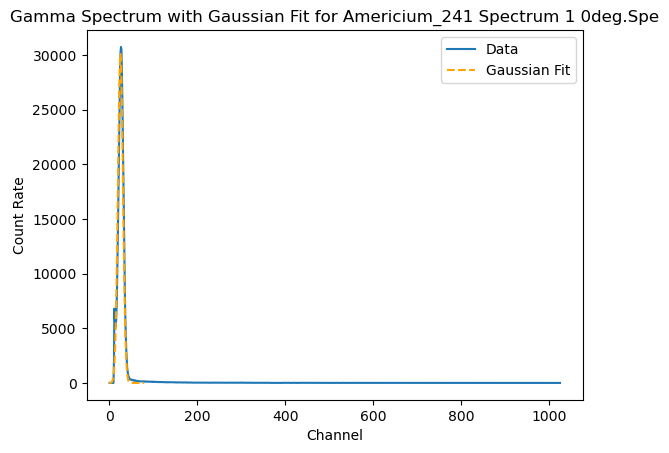

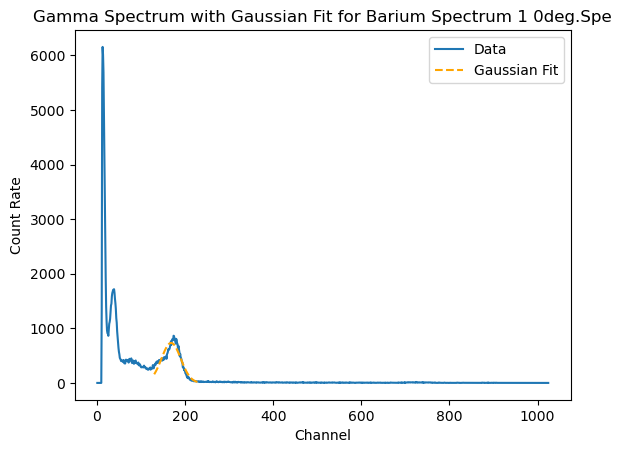

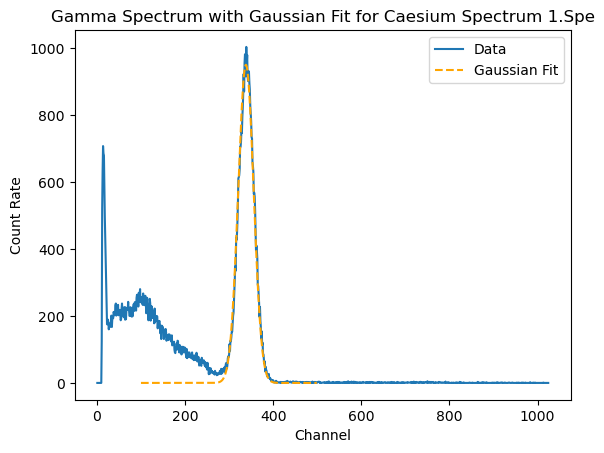

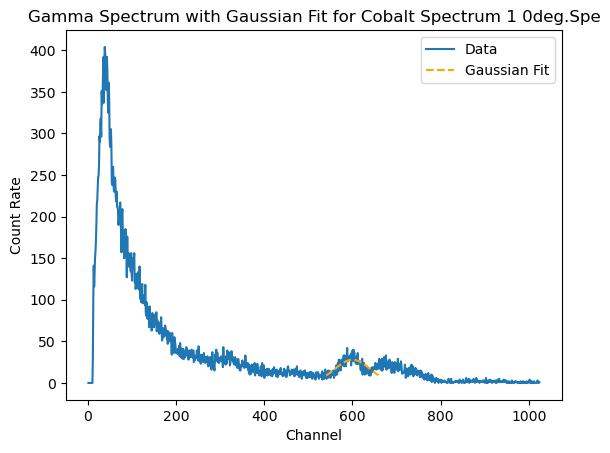

In [39]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

folder_path = r"C:\Users\surya\Desktop\SpaceDetectorLabGroup2-main\gamma"

channels = np.arange(1, 1025, 1)

def read_file(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file.readlines():
            data.append(line.strip())
        data = data[data.index('$DATA:') + 2 : data.index('$ROI:')]
        data = np.asarray(data).astype('i')
    return data


def gaussian(x, a, x0, sigma):
    return a * np.exp(-((x - x0) ** 2) / (2 * sigma ** 2))

config = {
    "Americium": {
        "peak_center": 40,
        "fit_range": 40,
        "initial_guess": [27000, 40, 20]
    },
    "Barium": {
        "peak_center": 180,    # Center of peak for Barium
        "fit_range": 50,       # Range around the peak to fit
        "initial_guess": [6000, 180, 10]  # Initial guess: amplitude, center, sigma
    },

    "Caesium": {
        "peak_center": 300,
        "fit_range": 200,
        "initial_guess": [800, 300, 15]
    },
    "Cobalt": {
        "peak_center": 600,
        "fit_range": 60,
        "initial_guess": [150, 600, 20]
    }
}

for file_name in os.listdir(folder_path):
    if file_name.endswith('.Spe'):  # Process only .Spe files
        
       
        matched_config = None
        for key in config.keys():
            if key in file_name:
                matched_config = config[key]
                break
        
        # If no specific configuration is found, skip this file
        if matched_config is None:
            print(f"No configuration found for {file_name}, skipping...")
            continue

        file_path = os.path.join(folder_path, file_name)
        
       
        sample = read_file(file_path)
        
        # Extract the data subset for fitting based on configuration
        peak_center = matched_config["peak_center"]
        fit_range = matched_config["fit_range"]
        fit_channels = np.arange(peak_center - fit_range, peak_center + fit_range)
        subset_data = sample[peak_center - fit_range : peak_center + fit_range]
        
        
        initial_guess = matched_config["initial_guess"]
        
       
        try:
            popt, _ = curve_fit(gaussian, fit_channels, subset_data, p0=initial_guess)
        except RuntimeError:
            print(f"Could not fit Gaussian for {file_name}")
            continue

        plt.plot(channels, sample, label="Data")
        plt.plot(fit_channels, gaussian(fit_channels, *popt), label="Gaussian Fit", linestyle="--", color="orange")
        plt.xlabel("Channel")
        plt.ylabel("Count Rate")
        plt.title(f"Gamma Spectrum with Gaussian Fit for {file_name}")
        plt.legend()
        plt.show()

   

calibration

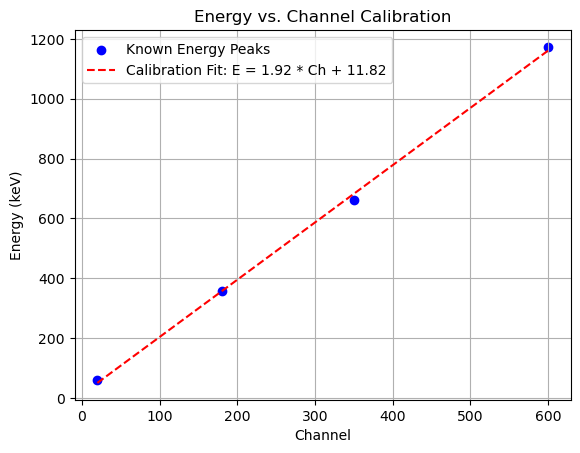

Calibration equation: Energy (keV) = 1.92 * Channel + 11.82


In [23]:
energies = {
    "Americium": 59.5,   # keV
    "Barium": 356.0,    
    "Caesium": 661.7,   
    "Cobalt": 1173.2,  
}
channels = {
    "Americium": 20,   
    "Barium": 180,     
    "Caesium": 350,   
    "Cobalt": 600,  
}
energy_values = []
channel_values = []

for isotope, energy in energies.items():
    if isinstance(energy, list):
        energy_values.extend(energy)
        channel_values.extend(channels[isotope])
    else:
        energy_values.append(energy)
        channel_values.append(channels[isotope])

coefficients = np.polyfit(channel_values, energy_values, 1)
m, c = coefficients

fitted_energies = np.polyval(coefficients, channel_values)

plt.scatter(channel_values, energy_values, color='blue', label='Known Energy Peaks')
plt.plot(channel_values, fitted_energies, color='red', linestyle='--', label=f'Calibration Fit: E = {m:.2f} * Ch + {c:.2f}')
plt.xlabel("Channel")
plt.ylabel("Energy (keV)")
plt.title("Energy vs. Channel Calibration")
plt.legend()
plt.grid()
plt.show()

print(f"Calibration equation: Energy (keV) = {m:.2f} * Channel + {c:.2f}")


RESOLUTION 

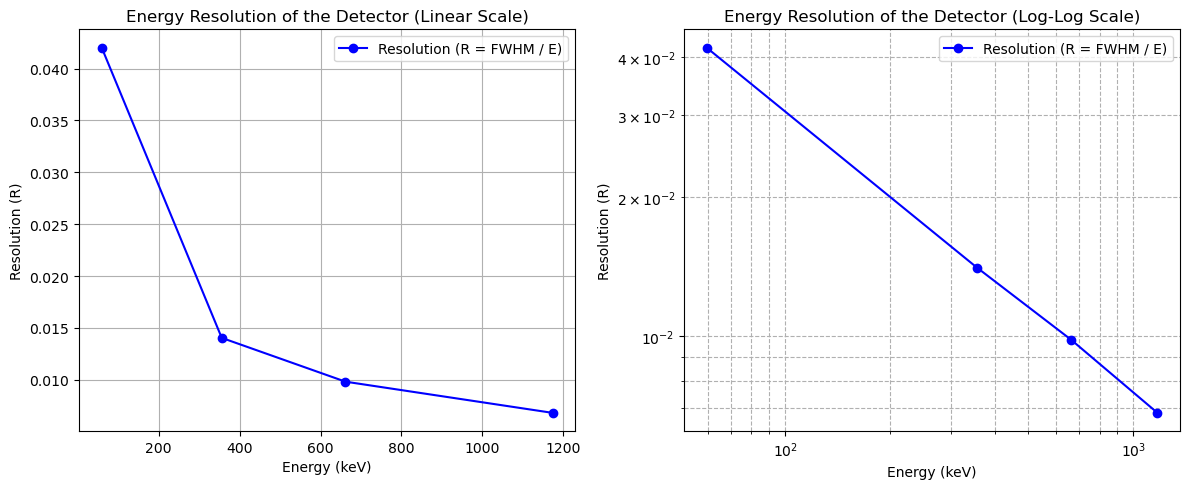

In [26]:

energies = {
    "Americium": 59.5,   # keV
    "Barium": 356.0,     # keV
    "Caesium": 661.7,    # keV
    "Cobalt": 1173.2, 
}
fwhm_values = {
    "Americium": 2.5,   # FWHM value in keV (replace with calculated FWHM)
    "Barium": 5.0,      
    "Caesium": 6.5,     
    "Cobalt": 8.0,  
}
energy_values = []
resolution_values = []

for isotope, energy in energies.items():
    if isinstance(energy, list):  # For isotopes with multiple peaks (like Cobalt)
        for e, fwhm in zip(energy, fwhm_values[isotope]):
            energy_values.append(e)
            resolution_values.append(fwhm / e)
    else:
        energy_values.append(energy)
        resolution_values.append(fwhm_values[isotope] / energy)
        
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(energy_values, resolution_values, 'bo-', label="Resolution (R = FWHM / E)")
plt.xlabel("Energy (keV)")
plt.ylabel("Resolution (R)")
plt.title("Energy Resolution of the Detector (Linear Scale)")
plt.grid()
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(energy_values, resolution_values, 'bo-', label="Resolution (R = FWHM / E)")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Energy (keV)")
plt.ylabel("Resolution (R)")
plt.title("Energy Resolution of the Detector (Log-Log Scale)")
plt.grid(True, which="both", ls="--")
plt.legend()

plt.tight_layout()
plt.show()


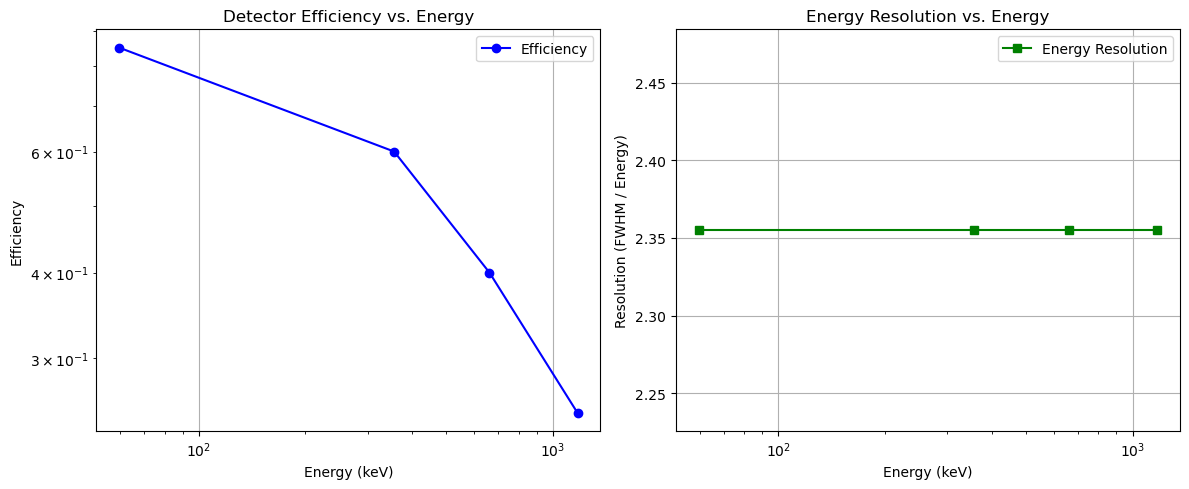

In [49]:

energies = np.array([59.5, 356.0, 661.7, 1173.2])  # Energies in keV for each source
efficiencies = np.array([0.85, 0.6, 0.4, 0.25])  # Measured efficiency values (absolute or intrinsic)
fwhm_values = energies * 2.355

resolutions = fwhm_values / energies

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(energies, efficiencies, 'o-', color='blue', label='Efficiency')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy (keV)')
plt.ylabel('Efficiency')
plt.title('Detector Efficiency vs. Energy')
plt.grid(True)
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(energies, resolutions, 's-', color='green', label='Energy Resolution')
plt.xscale('log')
plt.xlabel('Energy (keV)')
plt.ylabel('Resolution (FWHM / Energy)')
plt.title('Energy Resolution vs. Energy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
